In [1]:
from pyspark import SparkContext
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('cluster').getOrCreate()
from pyspark.sql.functions import split

#Sunspots = pd.read_csv("data/Sunspots.csv" )
df = spark.read.load('hdfs://cluster-7b78-m/user/dataproc/Sunspots.csv',format="csv", sep=",", inferSchema="true", header="true")


In [4]:

from pyspark.sql.functions import substring, length, col, expr
from pyspark.sql.functions import split
df = spark.read.load('hdfs://cluster-7b78-m/user/dataproc/Sunspots.csv', sep=",", inferSchema="true", header="true")
df1 = df.withColumn("Year",expr("substring(Date, 1, length(Date)-6)"))
df1 = df1.withColumn("Month",expr("substring(Date, 1, length(Date)-3)"))


## Getting years with highest and lowest averages 

In [54]:
df1 = df1.groupBy("Year").avg("Monthly Mean Total Sunspot Number")
df1 = df1.withColumnRenamed("avg(Monthly Mean Total Sunspot Number)","Average")

from pyspark.sql.functions import round, col

df1.select("*",round("Average",2)).drop('Average').withColumnRenamed("round(Average, 2)","Average").sort("Average", ascending = False).show(10)

#df1.sort("Average").show(10)
#df1.sort("Average", ascending = False).show(10)

+----+-------+
|Year|Average|
+----+-------+
|1957| 268.84|
|1958|  261.4|
|1778| 257.28|
|1870| 231.78|
|1837| 230.49|
|1959|  224.8|
|1787| 220.05|
|1979| 219.86|
|1980| 218.98|
|1788| 218.17|
+----+-------+
only showing top 10 rows



## Monthly Averages

<BarContainer object of 12 artists>

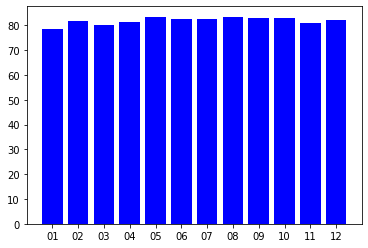

In [ ]:
df1 = df.withColumn("Year",expr("substring(Date, 1, length(Date)-6)"))
df1 = df1.withColumn("Month",expr("substring(Date, 1, length(Date)-3)"))
df = df1.withColumn("Month", df1.Month.substr(-2,3))

df_month_avg = df.groupBy("Month").avg("Monthly Mean Total Sunspot Number").withColumnRenamed("avg(Monthly Mean Total Sunspot Number)","Average").sort('Month')
pandasDF = df_month_avg.toPandas()

#df_month_avg.show()
a = pandasDF['Average']
b= pandasDF['Month']
plt.bar(b,a, color='blue', width=0.8)

In [ ]:
np.arange(1, df_month_avg.count()+1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

## 22 year trends

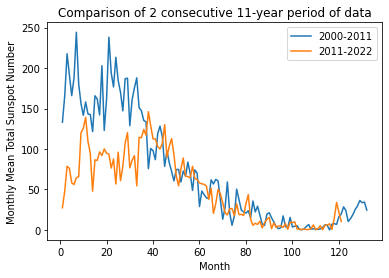

In [6]:
import plotly.express as px  

df1 = df.withColumn("Year",expr("substring(Date, 1, length(Date)-6)"))
df1 = df1.withColumn("Month",expr("substring(Date, 1, length(Date)-3)"))

eda = df1

YEAR_ORG = 2000
YEAR_1, YEAR_2, YEAR_3 = YEAR_ORG, YEAR_ORG+11, YEAR_ORG+22
df_1 = eda[(eda.Year>=YEAR_1) & (eda.Year<YEAR_2)]
df_2 = eda[(eda.Year>=YEAR_2) & (eda.Year<YEAR_3)]

x = np.arange(1, df_1.count()+1)
y = np.arange(1, df_2.count()+1)

plt.plot(x, np.array(df_1.select('Monthly Mean Total Sunspot Number').collect()), label=f'{YEAR_1}-{YEAR_2}')
plt.plot(y, np.array(df_2.select('Monthly Mean Total Sunspot Number').collect()), label=f'{YEAR_2}-{YEAR_3}')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Monthly Mean Total Sunspot Number')
plt.title('Comparison of 2 consecutive 11-year period of data')
plt.show()

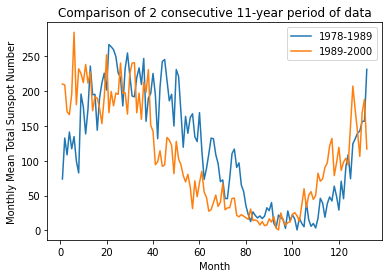

In [57]:
import plotly.express as px  

df1 = df.withColumn("Year",expr("substring(Date, 1, length(Date)-6)"))
df1 = df1.withColumn("Month",expr("substring(Date, 1, length(Date)-3)"))

eda = df1

YEAR_ORG = 1978
YEAR_1, YEAR_2, YEAR_3 = YEAR_ORG, YEAR_ORG+11, YEAR_ORG+22
df_1 = eda[(eda.Year>=YEAR_1) & (eda.Year<YEAR_2)]
df_2 = eda[(eda.Year>=YEAR_2) & (eda.Year<YEAR_3)]

x = np.arange(1, df_1.count()+1)
y = np.arange(1, df_2.count()+1)

plt.plot(x, np.array(df_1.select('Monthly Mean Total Sunspot Number').collect()), label=f'{YEAR_1}-{YEAR_2}')
plt.plot(y, np.array(df_2.select('Monthly Mean Total Sunspot Number').collect()), label=f'{YEAR_2}-{YEAR_3}')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Monthly Mean Total Sunspot Number')
plt.title('Comparison of 2 consecutive 11-year period of data')
plt.show()

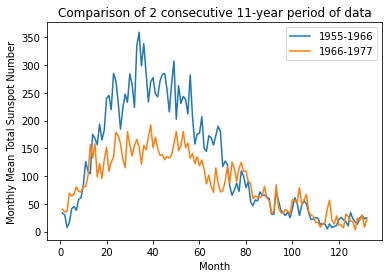

In [56]:
import plotly.express as px  

df1 = df.withColumn("Year",expr("substring(Date, 1, length(Date)-6)"))
df1 = df1.withColumn("Month",expr("substring(Date, 1, length(Date)-3)"))

eda = df1

YEAR_ORG = 1955
YEAR_1, YEAR_2, YEAR_3 = YEAR_ORG, YEAR_ORG+11, YEAR_ORG+22
df_1 = eda[(eda.Year>=YEAR_1) & (eda.Year<YEAR_2)]
df_2 = eda[(eda.Year>=YEAR_2) & (eda.Year<YEAR_3)]

x = np.arange(1, df_1.count()+1)
y = np.arange(1, df_2.count()+1)

plt.plot(x, np.array(df_1.select('Monthly Mean Total Sunspot Number').collect()), label=f'{YEAR_1}-{YEAR_2}')
plt.plot(y, np.array(df_2.select('Monthly Mean Total Sunspot Number').collect()), label=f'{YEAR_2}-{YEAR_3}')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Monthly Mean Total Sunspot Number')
plt.title('Comparison of 2 consecutive 11-year period of data')
plt.show()

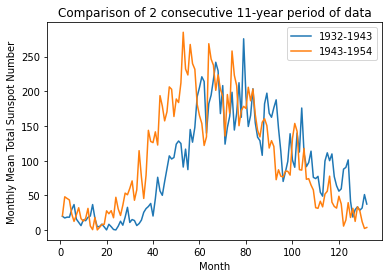

In [59]:
import plotly.express as px  

df1 = df.withColumn("Year",expr("substring(Date, 1, length(Date)-6)"))
df1 = df1.withColumn("Month",expr("substring(Date, 1, length(Date)-3)"))

eda = df1

YEAR_ORG = 1932
YEAR_1, YEAR_2, YEAR_3 = YEAR_ORG, YEAR_ORG+11, YEAR_ORG+22
df_1 = eda[(eda.Year>=YEAR_1) & (eda.Year<YEAR_2)]
df_2 = eda[(eda.Year>=YEAR_2) & (eda.Year<YEAR_3)]

x = np.arange(1, df_1.count()+1)
y = np.arange(1, df_2.count()+1)

plt.plot(x, np.array(df_1.select('Monthly Mean Total Sunspot Number').collect()), label=f'{YEAR_1}-{YEAR_2}')
plt.plot(y, np.array(df_2.select('Monthly Mean Total Sunspot Number').collect()), label=f'{YEAR_2}-{YEAR_3}')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Monthly Mean Total Sunspot Number')
plt.title('Comparison of 2 consecutive 11-year period of data')
plt.show()

In [ ]:
import plotly.express as px  
df1 = df.withColumn("Year",expr("substring(Date, 1, length(Date)-6)"))
df1 = df1.withColumn("Month",expr("substring(Date, 1, length(Date)-3)"))

eda = df1.toPandas()

fig = px.line(eda, x='Date', y='Monthly Mean Total Sunspot Number', title='Mean_Sunspot_Slider')
fig.update_xaxes(
    rangeslider_visible=False,
    rangeselector=dict(
        buttons=[
            dict(count=10, label="10y", step="year", stepmode="backward"),
            dict(count=20, label="20y", step="year", stepmode="backward"),
            dict(count=30, label="30y", step="year", stepmode="backward"),
            dict(count=40, label="40y", step="year", stepmode="backward"),
            dict(count=50, label="50y", step="year", stepmode="backward"),
            dict(step="all"),
        ]
    )
)
fig.show()

In [ ]:
eda


,Month,Average
0,01,78.331868
1,02,81.625368
2,03,80.205515
3,04,81.161397
4,05,83.135662
5,06,82.440441
6,07,82.323529
7,08,83.419485
8,09,82.863235
9,10,82.756985
